<figure>
  <IMG SRC="https://raw.githubusercontent.com/mbakker7/exploratory_computing_with_python/master/tudelft_logo.png" WIDTH=250 ALIGN="right">
</figure>

# Exploratory Computing with Python
*Developed by Mark Bakker with questions by Eefje Benschop*
## Notebook 8: Systems of linear equations

In [2]:
import requests
import json
import pandas as pd

collect_catalogus = ('https://waterwebservices.rijkswaterstaat.nl/METADATASERVICES_DBO/OphalenCatalogus/')


# get station information from DDL (metadata uit Catalogus)
request = {  
"CatalogusFilter":
    { 
    "Grootheden" :True,
    "Parameters":True,
    "Compartimenten":True,
    "Hoedanigheden":True,
    "Eenheden":True,
    "BemonsteringsApparaten" :True,
    "BemonsteringsMethoden":True,
    "BemonsteringsSoorten":True,
    "BioTaxon":True,
    "BioTaxon_Compartimenten":True,
    "MeetApparaten":True,
    "MonsterBewerkingsMethoden":True,
    "Organen":True,
    "PlaatsBepalingsApparaten":True,
    "Typeringen":True,
    "WaardeBepalingstechnieken":True,
    "WaardeBepalingsmethoden":True,
    "WaardeBewerkingsmethoden":True
    }

}

resp = requests.post(collect_catalogus, json=request)
result = resp.json()



# print all variables in the catalogus
df_metadata = pd.io.json.json_normalize(result['AquoMetadataLijst']).set_index('AquoMetadata_MessageID')

# Create new frames with all values
df_Compartiment = df_metadata.drop_duplicates(subset=['Compartiment.Code'])
df_Compartiment = df_Compartiment[['Compartiment.Code','Compartiment.Omschrijving']]

df_Parameters = df_metadata.drop_duplicates(subset=['Parameter.Code'])
df_Parameters = df_Parameters[['Parameter.Code','Parameter.Omschrijving']]

df_Eenheden = df_metadata.drop_duplicates(subset=['Eenheid.Code'])
df_Eenheden = df_Eenheden[['Eenheid.Code','Eenheid.Omschrijving']]

df_Grootheden = df_metadata.drop_duplicates(subset=['Grootheid.Code'])
df_Grootheden = df_Grootheden[['Grootheid.Code','Grootheid.Omschrijving']]

df_Hoedanigheden = df_metadata.drop_duplicates(subset=['Hoedanigheid.Code'])
df_Hoedanigheden = df_Hoedanigheden[['Hoedanigheid.Code','Hoedanigheid.Omschrijving']]

df_BemonsteringsApparaten = df_metadata.drop_duplicates(subset=['BemonsteringsApparaat.Code'])
df_BemonsteringsApparaten = df_BemonsteringsApparaten[['BemonsteringsApparaat.Code','BemonsteringsApparaat.Omschrijving']]

df_BemonsteringsMethoden = df_metadata.drop_duplicates(subset=['BemonsteringsMethode.Code'])
df_BemonsteringsMethoden = df_BemonsteringsMethoden[['BemonsteringsMethode.Code','BemonsteringsMethode.Omschrijving']]

df_BemonsteringsSoorten = df_metadata.drop_duplicates(subset=['BemonsteringsSoort.Code'])
df_BemonsteringsSoorten = df_BemonsteringsSoorten[['BemonsteringsSoort.Code','BemonsteringsSoort.Omschrijving']]

df_BioTaxon = df_metadata.drop_duplicates(subset=['BioTaxon.Code'])
df_BioTaxon = df_BioTaxon[['BioTaxon.Code','BioTaxon.Omschrijving']]

df_BioTaxon_Compartimenten = df_metadata.drop_duplicates(subset=['BioTaxon_Compartiment.Code'])
df_BioTaxon_Compartimenten= df_BioTaxon_Compartimenten[['BioTaxon_Compartiment.Code','BioTaxon_Compartiment.Omschrijving']]

df_MeetApparaten = df_metadata.drop_duplicates(subset=['MeetApparaat.Code'])
df_MeetApparaten = df_MeetApparaten[['MeetApparaat.Code','MeetApparaat.Omschrijving']]

df_MonsterBewerkingsMethoden = df_metadata.drop_duplicates(subset=['MonsterBewerkingsMethode.Code'])
df_MonsterBewerkingsMethoden = df_MonsterBewerkingsMethoden[['MonsterBewerkingsMethode.Code','MonsterBewerkingsMethode.Omschrijving']]

df_Organen= df_metadata.drop_duplicates(subset=['Orgaan.Code'])
df_Organen = df_Organen[['Orgaan.Code','Orgaan.Omschrijving']]

df_PlaatsBepalingsApparaten = df_metadata.drop_duplicates(subset=['PlaatsBepalingsApparaat.Code'])
df_PlaatsBepalingsApparaten = df_PlaatsBepalingsApparaten[['PlaatsBepalingsApparaat.Code','PlaatsBepalingsApparaat.Omschrijving']]

df_Typeringen= df_metadata.drop_duplicates(subset=['Typering.Code'])
df_Typeringen= df_Typeringen[['Typering.Code','Typering.Omschrijving']]

df_WaardeBepalingstechnieken= df_metadata.drop_duplicates(subset=['WaardeBepalingstechniek.Code'])
df_WaardeBepalingstechnieken= df_WaardeBepalingstechnieken[['WaardeBepalingstechniek.Code','WaardeBepalingstechniek.Omschrijving']]

df_WaardeBepalingsmethoden= df_metadata.drop_duplicates(subset=['WaardeBepalingsmethode.Code'])
df_WaardeBepalingsmethoden= df_WaardeBepalingsmethoden[['WaardeBepalingsmethode.Code','WaardeBepalingsmethode.Omschrijving']]

df_WaardeBewerkingsmethoden= df_metadata.drop_duplicates(subset=['WaardeBewerkingsmethode.Code'])
df_WaardeBewerkingsmethoden= df_WaardeBewerkingsmethoden[['WaardeBewerkingsmethode.Code','WaardeBewerkingsmethode.Omschrijving']]

# Create a Pandas Excel writer using XlsxWriter as the engine.
writer = pd.ExcelWriter('Values.xlsx', engine='xlsxwriter')

# Convert the dataframe to an XlsxWriter Excel object.
df_Parameters.to_excel(writer, sheet_name='Parameters')
df_Compartiment.to_excel(writer, sheet_name='Compartimenten')
df_Eenheden.to_excel(writer, sheet_name='Eenheden')
df_Hoedanigheden.to_excel(writer, sheet_name='Hoedanigheden')
df_Grootheden.to_excel(writer, sheet_name='Grootheden')
df_BemonsteringsApparaten.to_excel(writer, sheet_name='BemonsteringsApparaten')
df_BemonsteringsMethoden.to_excel(writer, sheet_name='BemonsteringsMethoden')
df_BemonsteringsSoorten.to_excel(writer, sheet_name='BemonsteringsSoorten')
df_BioTaxon.to_excel(writer, sheet_name='BioTaxon')
df_BioTaxon_Compartimenten.to_excel(writer, sheet_name='BioTaxon_Compartimenten')
df_MeetApparaten.to_excel(writer, sheet_name='MeetApparaten')
df_MonsterBewerkingsMethoden.to_excel(writer, sheet_name='MonsterBewerkingsMethoden')
df_Organen.to_excel(writer, sheet_name='Organen')
df_PlaatsBepalingsApparaten.to_excel(writer, sheet_name='PlaatsBepalingsApparaten')
df_Typeringen.to_excel(writer, sheet_name='Typeringen')
df_WaardeBepalingstechnieken.to_excel(writer, sheet_name='WaardeBepalingstechnieken')
df_WaardeBepalingsmethoden.to_excel(writer, sheet_name='WaardeBepalingsmethoden')
df_WaardeBewerkingsmethoden.to_excel(writer, sheet_name='WaardeBewerkingsmethoden')

# Close the Pandas Excel writer and output the Excel file.
writer.save()

<ipython-input-2-3e6530ccbaab>:40: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead
  df_metadata = pd.io.json.json_normalize(result['AquoMetadataLijst']).set_index('AquoMetadata_MessageID')


In this Notebook, we learn how to build and solve systems of linear equations, and we learn a few new (and very useful) `numpy` functions.

In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### Building and solving a system of linear equations
A parabola is defined by three points (provided they are not on a straight line). 
The equation for a parabola is $y=ax^2+bx+c$, where $a$, $b$, and $c$ are constants.
Given three points $(x_1,y_1)$, $(x_2,y_2)$, $(x_3,y_3)$, the following system of three linear equations may be compiled

$
\begin{split}
x_1^2a+x_1b+c&=y_1 \\
x_2^2a+x_2b+c&=y_2 \\
x_3^2a+x_3b+c&=y_3 \\
\end{split}
$

Or in matrix form

$
\left(
\begin{array}{ccc}
x_1^2 & x_1 & 1 \\
x_2^2 & x_2 & 1 \\
x_3^2 & x_3 & 1 \\
\end{array}
\right)
\left(
\begin{array}{c}
a \\b \\c \\
\end{array}
\right)
=
\left(
\begin{array}{c}
y_1 \\
y_2 \\
y_3 \\
\end{array}
\right)
$

To solve this problem, we build a two-dimensional array containing the matrix (called `matrix`) and a one-dimensional array containing the right-hand side (called `rhs`).
Let's do that for the three points $(x_1,y_1)=(-2,2)$, $(x_2,y_2)=(1,-1)$, $(x_3,y_3)=(4,4)$

In [2]:
xp = np.array([-2, 1, 4])
yp = np.array([2, -1, 4])
matrix = np.zeros((3, 3))
rhs = np.zeros(3)
for i in range(3):
    matrix[i] = xp[i] ** 2, xp[i], 1  # Store one row at a time
    rhs[i] = yp[i]
print('matrix:')
print(matrix)
print('rhs:',rhs)

matrix:
[[ 4. -2.  1.]
 [ 1.  1.  1.]
 [16.  4.  1.]]
rhs: [ 2. -1.  4.]


The system may be solved with the `solve` method, which is part of the `linalg` subpackage of `numpy`. The `solve` method takes as input a two-dimensional array (the matrix) and a one-dimensional array (the right-hand side) and returns the solution. To check whether the solution is correct, we need to do a matrix multiply of the matrix stored in the array `matrix` and the obtained solution, which we call `sol`. As we learned, `matrix * sol` does a term-by-term multiplication. For a matrix multiply, the `@` symbol needs to be used as in `matrix @ sol`.

In [3]:
sol = np.linalg.solve(matrix, rhs)
print('solution is:', sol)
print('specified values of y:', yp)
print('matrix @ sol:', matrix @ sol)

solution is: [ 0.44444444 -0.55555556 -0.88888889]
specified values of y: [ 2 -1  4]
matrix @ sol: [ 2. -1.  4.]


We can also visually check whether we solved the problem correctly by drawing the three points and the parabola. 

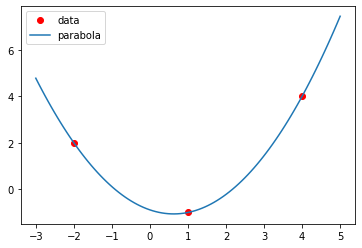

In [4]:
plt.plot(xp, yp, 'ro', label='data')
x = np.linspace(-3, 5, 100)
y = sol[0] * x ** 2 + sol[1] * x + sol[2]
plt.plot(x, y, label='parabola')
plt.legend();

### Exercise 1, Counting bikes
Five neighbors (Taylor, Lisa, Peter, Dan, and Lucia) and their families use a shared place to store their bikes. The sixth neighbor has just moved into the neighborhood and their daughter, Ann, tries to figure out how many bikes each neighbor has. For five nights, she counts the total number of bikes and checks to see where the lights are on, so she knows who is at home. Assume all people in a house are either at home or all people are not at home. Ann gathered the following information:

* The first day, lights are on in the houses of Taylor and Peter and there are 4 bikes parked. 
* The second day, Lisa, Peter and Lucia have lights on and Ann counts 5 bikes.
* The third day, Ann counts 3 bikes while lights are on at Peter's and Dan's.
* The fourth day lights are only out at Taylor's and there are 7 bikes parked.
* The last day Ann spots 6 bikes and everybody is home except Lucia.

Build and solve a system of five equations and five unknowns to determine the number of bikes in each household. Use a loop to print to the screen the name of each neighbor and the number of bikes. Use f-strings and print the numbers as integers (zero decimal places).

In [5]:
neighbors = ["Taylor", "Lisa", "Peter", "Dan", "Lucia"]
matrix = np.array([[1, 0, 1, 0, 0],
                   [0, 1, 1, 0, 1],
                   [0, 0, 1, 1, 0],
                   [0, 1, 1, 1, 1],
                   [1, 1, 1, 1, 0]
                  ])
rhs = [4, 5, 3, 7, 6]
sol = np.linalg.solve(matrix, rhs)

for i in range(len(sol)):
    print(f"{neighbors[i]} has {sol[i]:.0f} bikes")

Taylor has 3 bikes
Lisa has 0 bikes
Peter has 1 bikes
Dan has 2 bikes
Lucia has 4 bikes


### The inverse of a matrix
Sometimes it is beneficial to compute and store the inverse of a matrix rather than only the solution of the system of equations, for example when the inverse is used to compute many solutions. The inverse of a matrix may be computed with the `inv` function of the `linalg` package. If the inverse of matrix `A` is called `Ainv`, the solution may be obtained through matrix multiplication of `Ainv` with the right-hand side. For example, for the example of fitting a parabola through three points, the inverse of the matrix can be computed to obtain a solution as follows: 

In [6]:
A = np.array([[ 4, -2, 1],
              [ 1,  1, 1],
              [16,  4, 1]])
rhs = np.array([2, -1, 4])
sol = np.linalg.solve(A, rhs)
print('sol with solve:  ', sol)
Ainv = np.linalg.inv(A)
sol = Ainv @ rhs
print('sol with inverse:', sol)

sol with solve:   [ 0.44444444 -0.55555556 -0.88888889]
sol with inverse: [ 0.44444444 -0.55555556 -0.88888889]


### Exercise 2. Fitting a wave
Consider the following four measurements of the quantity $y$ at time $t$: $(t_0,y_0)=(0,3)$, $(t_1,y_1)=(0.25,1)$, $(t_2,y_2)=(0.5,-3)$, $(t_3,y_3)=(0.75,1)$. The measurements are part of a wave that may be written as

$$y = a + b\cos(\pi t) + c\cos(2\pi t) + d\cos(3\pi t)$$

where $a$, $b$, $c$, and $d$ are parameters. Build a system of four linear equations and solve for the four parameters. Create a plot of the wave for $t$ going from 0 to 1 and show the four measurements with dots.

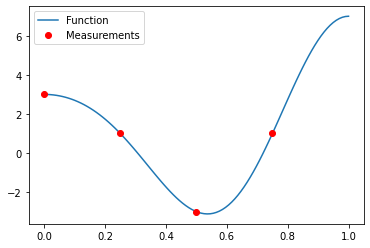

In [7]:
tp = [0, 0.25, 0.5, 0.75]
yp = rhs = [3, 1, -3, 1]

matrix = np.zeros((4, 4))
for i in range(4):
    matrix[i] = 1, np.cos(np.pi * tp[i]), np.cos(2 * np.pi * tp[i]), np.cos(3 * np.pi * tp[i])

sol = np.linalg.solve(matrix, rhs)

t = np.linspace(0, 1, 100)
y = sol[0] + sol[1] * np.cos(np.pi * t) + sol[2] * np.cos(2 * np.pi * t) + sol[3] * np.cos(3 * np.pi * t)

plt.plot(t, y, label="Function")
plt.plot(tp, rhs, 'ro', label="Measurements")
plt.legend()

### More equations than unknowns

What now if you have more equations than unknowns? For example, what if you have 6 points in time where you have measured the quantity $y$, but you still want to fit a wave with four periods (and four parameters). In general, there is no solution to a system of 6 equations with 4 unknowns, unless you are very lucky. A common approach is to try to find the four parameters that fit the 6 equations as good as possible. One way to do this is to find the four parameters such that the sum of the squares of the errors between the specified right-hand-side and the computed right-hand-side is as small as possible. It is very easy to do this with `numpy`. You can simply specify a matrix with $M$ rows and $N$ colums where $M$ is larger than $N$ (so more rows than columns). Combined with a right-hand-side with $M$ values, you can find a least-squares solution that best fits the equations. Use the `np.linalg.lstsq` function to compute a solution. Note that the `np.linalg.lstsq` solution returns four things, of which the first one is the least squares solution (use `np.linalg.lstsq?` to find out what else is returned).

### Exercise 3. Fitting a wave with more points
Consider the following six measurements of the quantity $y$ at time $t$: $(t_0,y_0)=(0,3)$, $(t_1,y_1)=(0.2,1)$, $(t_2,y_2)=(0.4,-3)$, $(t_3,y_3)=(0.6,1)$, $(t_4,y_4)=(0.8,3)$, $(t_5,y_5)=(1,2)$. The measurements are part of the same wave as in Exercise 2:

$$y = a + b\cos(\pi t) + c\cos(2\pi t) + d\cos(3\pi t)$$

Build a system of six linear equations for 4 unknown parameters and solve for the four parameters in a least squares sense. Create a plot of the wave for $t$ going from 0 to 1 and show the six measurements with dots. If you get a `FutureWaring`, add the keyword argument `rcond=None` to `np.linalg.lstsq`. 

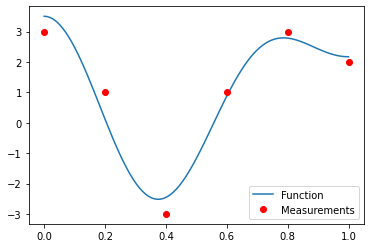

In [8]:
tp = [0, 0.2, 0.4, 0.6, 0.8, 1]
yp = rhs = [3, 1, -3, 1, 3, 2]

matrix = np.zeros((6, 4))
for i in range(6):
    matrix[i] = 1, np.cos(np.pi * tp[i]), np.cos(2 * np.pi * tp[i]), np.cos(3 * np.pi * tp[i])

sol = np.linalg.lstsq(matrix, rhs, rcond=None)

t = np.linspace(0, 1, 100)
y = sol[0][0] + sol[0][1] * np.cos(np.pi * t) + sol[0][2] * np.cos(2 * np.pi * t) + sol[0][3] * np.cos(3 * np.pi * t)

plt.plot(t, y, label="Function")
plt.plot(tp, rhs, 'ro', label="Measurements")
plt.legend()

### Packages and .py files
As you already know, there are many Python packages. The Anaconda distribution includes a (large) set of the most popular packages, which were installed on your machine when you installed Anaconda. You already used several of these packages, like `numpy`, `matplotlib`, and `scipy`. 

Each package consists of a number of Python files with the extension `.py`. These are text files with Python code. We will write our own Python files in a later notebook. To use functions in a Python file, you first have to import the file, just like you import a package. 

The following exercises make use of a function defined in a separate Python file. You can open (and edit) the Python file in Jupyter Lab by double clicking on the file in the left sidebar. 

### Exercise 4, Student hours programming
Consider a bunch of students living in a few student houses. The students keep track of the number of hours they are spending (enjoying!) programming in Python each week. You are asked to write a Python function to compute which person has spent the most hours programming. 

Write a function that takes as input argument a 2-D array of shape number of persons (rows) by  number of weeks (columns). The function uses a loop (or a nested loop) to count the total number of hours each student has spent programming. The function returns two values: the number of the student (the number of the row) that has spent the most hours programming and the total number of hours spent programming by that student. 

In a new code cell, generate the data by running the function `hours_programming` in the Python file `generatedata.py` using 4 houses, 18 students in each house, and 12 weeks. Note: you are *not* allowed to copy the Python code from the `generatedata.py` file in a code cell. Loop through all the data and for each house print the statement

`in house x, student y is the winner and spent z hours programming`

where, of course, you print the correct values of x, y, and z. 

In [9]:
from generatedata import *

def count (array):
    sumHours = np.zeros(len(array))
    maxHours = maxStudent = 0

    for studentIndex in range(len(array)):
        sumHours[studentIndex] = np.sum(array[studentIndex])

        if (sumHours[studentIndex] > maxHours):
            maxHours = sumHours[studentIndex]
            maxStudent = studentIndex + 1
    
    return maxStudent, maxHours

data = hours_programming()

for houseIndex in range(len(data)):
    print(f"in house {houseIndex + 1}, student {count(hours_programming()[houseIndex])[0]:.0f} is the winner and spent {count(hours_programming()[houseIndex])[1]} hours programming")

in house 1, student 10 is the winner and spent 128.0 hours programming
in house 2, student 3 is the winner and spent 124.0 hours programming
in house 3, student 15 is the winner and spent 127.0 hours programming
in house 4, student 18 is the winner and spent 130.0 hours programming


### The `%timeit` magic function
You can time how long a computation takes by using the `%timeit` magic function. This is not a Python function, but an IPython function, which means it works in Jupyter Notebooks and other IPython consoles. For example, you can time how long it takes to compute the cosine function of 10,000 values (note how quick this is - it is probably less than 1 micro second on your computer). 

In [ ]:
x = np.arange(0, np.pi, 10000)
%timeit y = np.cos(x)

### The `np.sum` function
Recall that the `np.sum` function can be used to sum an array. It has a very useful keyword argument `axis` (the second argument of the function), which is the number of the axis over which to sum. For a two-dimensional array, axis 0 are the rows and axis 1 are the columns (they are index 0 and 1 of the array). For example

In [ ]:
a = np.arange(12)
a.shape = (3, 4)  # 3 rows, 4 columns
print(a)

In [ ]:
print('sum entire array:')
print(np.sum(a))
print('sum the rows:')
print(np.sum(a, 0))
print('sum the columns:')
print(np.sum(a, 1))

### Exercise 5, Student hours programming - revisited

In Exercise 4, you wrote a function with at least one `for` loop. Now you are asked to write a new function that does the same job, but does not use any `for` loops. Give your function a different name than in Exercise 4. Test the new function with the same data.

Next, run both functions for the first house of the data you generated and check which one is faster using `%timeit`. Even for this small array, it should make a significant difference.

In [ ]:
from generatedata import *

def countRevisited (array):
    sumHours = np.zeros(len(array))
    maxHours = maxStudent = 0

    sumHours = np.sum(array, axis=1)
    maxHours = np.max(sumHours)
    maxStudent = np.argmax(sumHours) + 1
    
    return maxStudent, maxHours

data = hours_programming()

for houseIndex in range(len(data)):
    print(f"in house {houseIndex + 1}, student {countRevisited(hours_programming()[houseIndex])[0]:.0f} is the winner and spent {countRevisited(hours_programming()[houseIndex])[1]} hours programming")
    
%timeit count(hours_programming()[0])
%timeit countRevisited(hours_programming()[0])

### Changing the length of a `list` or `array`
If you don't know the length of a list beforehand, you can start with an empty list and add a value to the list whenever you want using the `.append` syntax:

In [ ]:
alist = []
for i in range(5):
    alist.append(i)
print(alist)

The same can technically be done with an array using the `np.hstack` function that stacks two arrays by connecting the tail of one with the head of the other. This can be done for an array and a number or two arrays:

In [ ]:
anarray = np.array([])
for i in range(5):
    anarray = np.hstack((anarray, i))
print(anarray)

Note, however, that changing the length of a list is fast, while changing the length of an array is (very) slow and should be avoided. In the code below, the function `func1` increases the length of an array, while the function `func2` does the same but for a list. When 10 numbers are added to a list or array, the difference in computational speed is already more than a factor of 10 and it increases dramatically when more numbers are added.

In [ ]:
def func1(n=10): # increase length of array n times
    a = np.array([])
    for i in range(n):
        a = np.hstack((a, i))
    return a

In [ ]:
def func2(n=10): # increase length of list n times
    a = []
    for i in range(n):
        a.append(i)
    return np.array(a)

In [ ]:
print('adding 10 values to an array takes:')
%timeit func1(n=10)
print('adding 10 values to a list takes:')
%timeit func2(n=10)

In [ ]:
print('adding 100 values to an array takes:')
%timeit func1(n=100)
print('adding 10 values to a list takes:')
%timeit func2(n=100)

You may wonder why it is so much slower to add a value to an array than to add a value to a list. The explanation requires a bit of computer science. When adding a number to a list, all Python has to do is store the new value and the location in memory of the new value. This can not be done for arrays, as all values in an array are stored in one consecutive block in memory. When adding a number to an array, Python needs to find a new block of memory that can store one additional value, then copy all current values plus the new value to this block. And that all is very slow. But there is a benefit: as arrays are stored as one block in memory, the math on arrays is lightning fast. Remember how much time it took to compute 10,000 cosine values? That was hugely impressive. 

### Exercise 6, Detecting the sick
A disease has broken out in a hospital. The hospital has contained all 100 patients and knows their DNA sequences. The disease can be detected by an alteration in the DNA of the patient. If the DNA of a patient contains the gene `AU` the person will get sick. 

Load the file `DNA_sequence_nb7.txt`, which contains 1000 genes (columns) for 100 patients (rows). Use a double loop and a `break` to find the indices of the persons with the altered gene. Store the numbers of all sick persons in a list and print the final list to the screen.

In [ ]:
sickPeople = []
data = np.loadtxt("DNA_sequence_nb7.txt", dtype=str, delimiter = ",")

for DNAIndex in range(len(data)):
    for GENEIndex in range(len(data[DNAIndex])):
        if (data[DNAIndex][GENEIndex] == "AU"):
            sickPeople.append(DNAIndex)
            break
            
print(sickPeople)

### The `np.any` and `np.all` functions
The `np.all` function returns `True` if a condition is met for *all* values in an array. Conversely, the `np.any` returns `True` if a condition is met for *any* of the values in an array (so the condition is met for at least one of the values).

In [ ]:
a = np.arange(10)
print('array:', a)
print('all values below 10:', np.all(a < 10))
print('all values above 3:', np.all(a > 3))
print('any values above 3:', np.any(a > 3))

### Exercise 7. Detecting the sick - revisited
Redo Exercise 6, but now use one single loop (instead of a double loop) but with either `np.any` or `np.all`. 

In [ ]:
sickPeople = []
data = np.loadtxt("DNA_sequence_nb7.txt", dtype=str, delimiter = ",")

for DNAIndex in range(len(data)):
    if (np.any(data[DNAIndex] == "AU")):
        sickPeople.append(DNAIndex)
            
print(sickPeople)